Import data into the notebook

In [1]:
import pandas as pd #package for reading data
import numpy as np 
import matplotlib.pyplot as plt #package for creating plots
import statsmodels.api as sm

In [2]:
data_folder = "data/"
entry = pd.read_csv(data_folder + "entry.csv")
print(entry.describe())

                HD        state          LO     state.1          time  \
count  1584.000000  1584.000000  633.000000  633.000000  1.584000e+03   
mean      1.254419    27.139520    1.273302   28.050553  1.597122e+09   
std       0.994765    16.299669    0.816870   16.530868  3.313120e+04   
min       1.000000     1.000000    1.000000    1.000000  1.597100e+09   
25%       1.000000    12.000000    1.000000   12.000000  1.597100e+09   
50%       1.000000    26.000000    1.000000   29.000000  1.597101e+09   
75%       1.000000    41.000000    1.000000   45.000000  1.597172e+09   
max      19.000000    78.000000   10.000000   56.000000  1.597174e+09   

             STATE       STATENS    population      under44_1      under44_2  \
count  1584.000000  1.584000e+03  1.449000e+03    1443.000000    1443.000000   
mean     27.139520  1.503874e+06  6.947162e+04    7389.017325   10960.044352   
std      16.299669  4.924067e+05  1.463462e+05   15760.371513   26923.922447   
min       1.000000  6.

How many Home Depots/Lowe's are there in total

In [3]:
# number of Home Depot stores
entry['HD'].sum()

1987

In [4]:
# number of Lowe's stores
entry['LO'].sum()

806.0

Which State had the most new openings in this time period? For each store, and then both?

In [5]:
# state with most new openings for both HD and LOW
entry['sum_column'] = entry.fillna(0)['HD'] + entry.fillna(0)['LO']
most_openings_all = pd.DataFrame(entry.groupby('STUSAB')['sum_column'].sum().sort_values(ascending = False))
most_openings_all.head(1)

,sum_column
STUSAB,
CA,301.0


In [6]:
# state with most new openings for HD
most_openings_HD = pd.DataFrame(entry.groupby('STUSAB')['HD'].sum())
most_openings_HD.sort_values('HD', ascending = False).drop_duplicates().head(1)

,HD
STUSAB,
CA,233


In [7]:
# state with most new openings for LO
most_openings_HD = pd.DataFrame(entry.groupby('STUSAB')['LO'].sum())
most_openings_HD.sort_values('LO', ascending = False).drop_duplicates().head(1)

,LO
STUSAB,
TX,101.0


Are the location decisions of Lowe's and Home Depot Correlated? Create a scatter plot with Lowe's and Home Depot's entry decisions. Also report the correlation. Fill NAs with 0s.

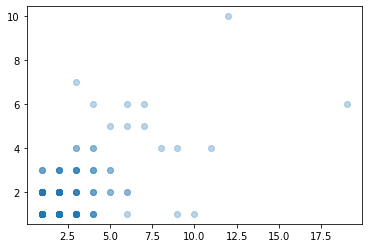

In [8]:
# scatterplot
plt.scatter(entry['HD'], entry['LO'],alpha =.3)

In [9]:
# correlation
round(entry['HD'].corr(entry['LO']), 4)

0.6639

What happens if you control for population? Create a variance covariance matrix with the following variables. 
* Lowe's entry
* Home Depot entry
* Population
* Per Capita Income

In [10]:
entry[['LO', 'HD', 'population', 'income_per_capita']].cov()

,LO,HD,population,income_per_capita
LO,0.667277,0.760089,1.100259e+05,6.425281e+05
HD,0.760089,0.989557,9.201187e+04,2.432808e+05
population,110025.905071,92011.867012,2.141720e+10,6.405249e+10
income_per_capita,642528.117808,243280.780117,6.405249e+10,6.135085e+14


Also create scatter plots with number of stores and population.

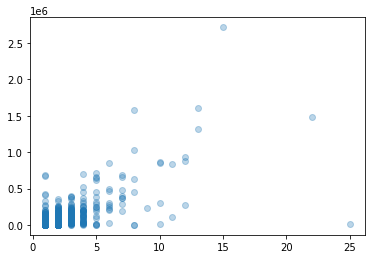

In [11]:
# scatterplot
plt.scatter(entry['sum_column'], entry['population'],alpha =.3)